In [4]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ast # For safe evaluation
import random
import os
import random
import numpy as np

In [6]:
# Define the CNN architecture (must be the same as during training)
class CharacterRecognizerCNN(nn.Module):
    def __init__(self, num_classes):
        super(CharacterRecognizerCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1_input_size = 128 * (45 // (2**3)) * (45 // (2**3)) # Assuming img_size = 45
        self.fc1 = nn.Linear(self.fc1_input_size, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)

        self.img_size = 45

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = x.view(-1, self.fc1_input_size)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the class names (important for mapping predictions back to characters)
data_dir = '/Users/gvklok/Documents/CST-425/MathSolver/Dataset' # Adjust if needed
train_dir = os.path.join(data_dir, 'train')
train_dataset = datasets.ImageFolder(train_dir) # No transform needed here
class_names = train_dataset.classes
num_classes = len(class_names)

# Load the trained model
model = CharacterRecognizerCNN(num_classes)
model.load_state_dict(torch.load('/Users/gvklok/Documents/CST-425/MathSolver/character_recognizer.pth'))
model.eval() # Set the model to evaluation mode for inference

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

print("Trained model loaded.")
print(f"Class names: {class_names}")

Trained model loaded.
Class names: ['decimal', 'divide', 'eight', 'equal', 'five', 'four', 'minus', 'nine', 'one', 'plus', 'seven', 'six', 'three', 'times', 'two', 'zero']


/var/folders/5p/9g5d24r916j78rp17ymd9l0w0000gn/T/ipykernel_1433/1441623411.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/Users/gvkl

In [ ]:
# def equation_generator(numbers=2, max_num=101):
#     assert numbers > 1, "You need at least two numbers to generate a valid equation"
#     # Generate numbers and operators
#     generated_eqn = []
#     operators = ['+', '-', '*', '/'] # Include division
#     for _ in range(numbers):
#         gen_num = np.random.randint(1, max_num + 1) # Avoid zero for division simplicity
#         generated_eqn.append(str(gen_num))
#         if _ < numbers - 1:
#             operator = random.choice(operators)
#             generated_eqn.append(operator)
#     # Turn into string
#     generated_eqn_str = ''.join(generated_eqn)
#     try:
#         ans = eval(generated_eqn_str)
#         ans_string = '=' + str(ans)
#         return generated_eqn_str + ans_string
#     except ZeroDivisionError:
#         return equation_generator(numbers, max_num) # Regenerate if division by zero occurs
#     except Exception as e:
#         print(f"Error evaluating equation: {generated_eqn_str} - {e}")
#         return None # Or handle the error as you see fit

# # Generate a test equation
# test_equation_with_answer = equation_generator(numbers=3, max_num=10)
# print(f"Generated test equation: {test_equation_with_answer}")

Generated test equation: 7+1/10=7.1


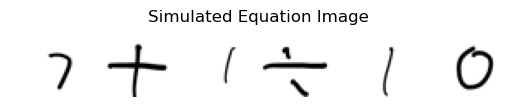

In [ ]:
# import random
# from PIL import Image

# def random_sample_file(directory):
#     # Randomly selects a file from a directory
#     files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
#     if not files:
#         return None
#     return os.path.join(directory, random.choice(files))

# def generate_equation_image(equation_string, character_folder_path, target_height=45, crop_bottom_percent=0.1): # Added crop_bottom_percent
#     digit_map = {
#         '0': 'zero', '1': 'one', '2': 'two', '3': 'three', '4': 'four',
#         '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine'
#     }
#     image_list = []
#     for char in equation_string:
#         if char in digit_map:
#             char_folder = os.path.join(character_folder_path, digit_map[char])
#         elif char == '*':
#             char_folder = os.path.join(character_folder_path, 'times')
#         elif char == '/':
#             char_folder = os.path.join(character_folder_path, 'divide')
#         elif char == '+':
#             char_folder = os.path.join(character_folder_path, 'plus')
#         elif char == '-':
#             char_folder = os.path.join(character_folder_path, 'minus')
#         elif char == '=':
#             char_folder = os.path.join(character_folder_path, 'equal')
#         elif char == '.':
#             char_folder = os.path.join(character_folder_path, 'decimal')
#         else:
#             print(f"Warning: Unknown character '{char}' in equation")
#             continue

#         image_file = random_sample_file(char_folder)
#         if image_file:
#             img = Image.open(image_file).convert('L') # Open as grayscale
#             # Resize to target height while maintaining aspect ratio
#             aspect_ratio = img.width / img.height
#             new_width = int(target_height * aspect_ratio)
#             img = img.resize((new_width, target_height))

#             # Crop from the bottom
#             crop_pixels = int(target_height * crop_bottom_percent)
#             img = img.crop((0, 0, img.width, img.height - crop_pixels))

#             image_list.append(img)
#         else:
#             print(f"Warning: No image found for character '{char}' in '{char_folder}'")
#             return None

#     if not image_list:
#         return None

#     # Concatenate images horizontally
#     total_width = sum(img.width for img in image_list)
#     max_height = max(img.height for img in image_list)
#     combined_image = Image.new('L', (total_width, max_height), color=255) # White background

#     x_offset = 0
#     for img in image_list:
#         combined_image.paste(img, (x_offset, 0))
#         x_offset += img.width

#     return combined_image

# # Example usage (you can adjust crop_bottom_percent if needed):
# character_dataset_path = '/Users/gvklok/Documents/CST-425/MathSolver/Dataset/train' # Adjust this to your training data path
# if test_equation_with_answer:
#     equation_image = generate_equation_image(test_equation_with_answer.split('=')[0], character_dataset_path, crop_bottom_percent=0.1) # Crop 10% from the bottom
#     if equation_image:
#         plt.imshow(equation_image, cmap='gray')
#         plt.title("Simulated Equation Image")
#         plt.axis('off')
#         plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image as PILImage
import numpy as np
from ipycanvas import Canvas

# --- Configuration ---
canvas_width = 200
canvas_height = 80
line_color = "#000000"  # Black
background_color = "white"
line_width = 2

# --- Canvas Setup ---
canvas = Canvas(width=canvas_width, height=canvas_height, sync_image_data=True)
canvas.fill_style = background_color
canvas.fill_rect(0, 0, canvas_width, canvas_height)
canvas.stroke_style = line_color
canvas.line_width = line_width
canvas.line_cap = 'round'
canvas.line_join = 'round'

# --- UI Elements ---
clear_button = widgets.Button(description="Clear")
save_button = widgets.Button(description="Save Image")
output_area = widgets.Output()

# --- Image Storage ---
equation_image = None

class SketchPad:
    def __init__(self, canvas):
        self.canvas = canvas
        self._is_drawing = False
        self._last_x = None
        self._last_y = None
        self._setup_event_handlers()

    def _setup_event_handlers(self):
        self.canvas.on_mouse_down(self._start_path)
        self.canvas.on_mouse_move(self._draw_segment)
        self.canvas.on_mouse_up(self._end_path)
        self.canvas.on_mouse_out(self._end_path)

    def _start_path(self, x, y):
        self._is_drawing = True
        self._last_x = x
        self._last_y = y
        self.canvas.begin_path()
        self.canvas.move_to(x, y)

    def _draw_segment(self, x, y):
        if not self._is_drawing:
            return
        self.canvas.line_to(x, y)
        self.canvas.stroke()
        self.canvas.begin_path()
        self.canvas.move_to(x, y)
        self._last_x = x
        self._last_y = y

    def _end_path(self, x=None, y=None):
        if not self._is_drawing:
            return
        if x is not None and y is not None:
            self.canvas.line_to(x, y)
            self.canvas.stroke()
        self._is_drawing = False
        self._last_x = None
        self._last_y = None

    def clear(self):
        self.canvas.clear()
        self.canvas.fill_style = background_color
        self.canvas.fill_rect(0, 0, self.canvas.width, self.canvas.height)
        self.canvas.stroke_style = line_color
        self.canvas.line_width = line_width
        self.canvas.line_cap = 'round'
        self.canvas.line_join = 'round'

    def get_image(self):
        try:
            image_data = self.canvas.get_image_data()
            return PILImage.fromarray(image_data, 'RGBA') if image_data is not None and image_data.shape[0] > 0 else None
        except Exception as e:
            print(f"Error retrieving image: {e}")
            return None

# --- Instantiate SketchPad ---
drawing_pad = SketchPad(canvas)

# --- Button Actions ---
def handle_clear_click(button):
    with output_area:
        clear_output()
        drawing_pad.clear()
        global captured_image
        equation_image = None
        print("Canvas has been cleared.")

def handle_save_click(button):
    global equation_image
    image = drawing_pad.get_image()
    with output_area:
        clear_output(wait=True)
        if image:
            equation_image = image
            print(f"Image captured (mode={image.mode}, size={image.size}).")
            display(image)
        else:
            print("No image data available. Please draw something.")

# --- Connect Buttons to Actions ---
clear_button.on_click(handle_clear_click)
save_button.on_click(handle_save_click)

# --- Display the Interface ---
display(widgets.VBox([
    canvas,
    widgets.HBox([clear_button, save_button]),
    output_area
]))

# The 'captured_image' variable now holds the PIL Image object
# after you click the "Save Image" button.

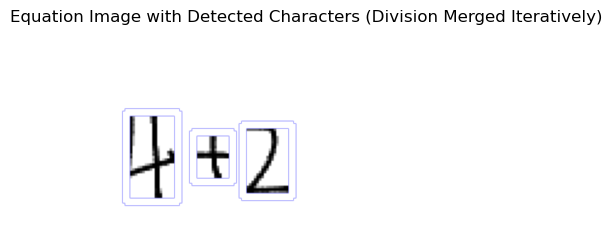

Detected 3 character regions


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Make sure this is imported

def is_fully_within_x(inner_rect, outer_rect):
    """Checks if the x-range of inner_rect is fully within outer_rect."""
    inner_x_start, _, inner_width, _ = inner_rect
    outer_x_start, _, outer_width, _ = outer_rect
    return outer_x_start <= inner_x_start and (inner_x_start + inner_width) <= (outer_x_start + outer_width)

def merge_rects(rect1, rect2):
    """Merges two bounding boxes into one."""
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    new_x = min(x1, x2)
    new_y = min(y1, y2)
    new_w = max(x1 + w1, x2 + w2) - new_x
    new_h = max(y1 + h1, y2 + h2) - new_y
    return (new_x, new_y, new_w, new_h)

def detect_contours_and_merge_division(image):
    # Convert PIL Image to OpenCV format (NumPy array)
    open_cv_image = np.array(image)
    # Convert RGB to grayscale if it's a color image
    if len(open_cv_image.shape) == 3:
        gray = cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2GRAY)
    else:
        gray = open_cv_image

    # Binarize the image
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get initial bounding boxes
    rects = [cv2.boundingRect(cnt) for cnt in contours]
    if not rects:
        return []

    # Sort bounding boxes by x-coordinate
    rects.sort(key=lambda x: x[0])

    merged = True
    while merged:
        merged = False
        new_rects = []
        n = len(rects)
        merged_indices = [False] * n
        for i in range(n):
            if not merged_indices[i]:
                current_rect = rects[i]
                for j in range(i + 1, n):
                    if not merged_indices[j]:
                        other_rect = rects[j]
                        if is_fully_within_x(current_rect, other_rect) or is_fully_within_x(other_rect, current_rect):
                            current_rect = merge_rects(current_rect, other_rect)
                            merged_indices[i] = True
                            merged_indices[j] = True
                            merged = True
                new_rects.append(current_rect)
        rects = new_rects

    # Filter out very small boxes (potential noise)
    min_area = 20
    filtered_rects = [(x, y, w, h) for x, y, w, h in rects if w * h > min_area]
    return filtered_rects

# Example usage (assuming 'equation_image' is a PIL Image object):
if 'equation_image' in locals():
    bounding_boxes = detect_contours_and_merge_division(equation_image)

    # Draw bounding boxes on the image for visualization
    image_with_boxes = np.array(equation_image).copy()
    if len(image_with_boxes.shape) == 2:
        image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_GRAY2BGR)
    else:
        image_with_boxes = image_with_boxes.copy()

    for x, y, w, h in bounding_boxes:
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 0, 255), 2) # Red boxes

    plt.imshow(image_with_boxes)
    plt.title("Equation Image with Detected Characters (Division Merged Iteratively)")
    plt.axis('off')
    plt.show()

    print(f"Detected {len(bounding_boxes)} character regions")
else:
    print("Please load 'equation_image' (a PIL Image object) to run the example.")

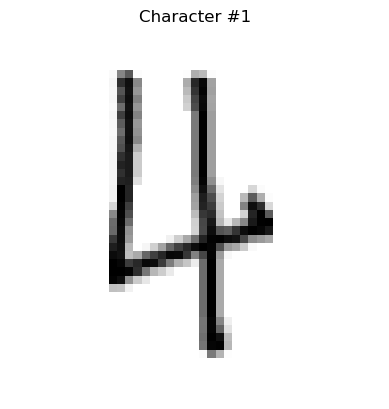

Recognized: 4


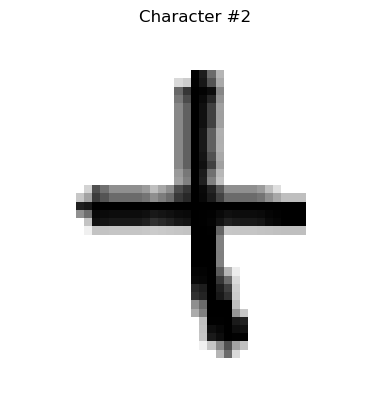

Recognized: +


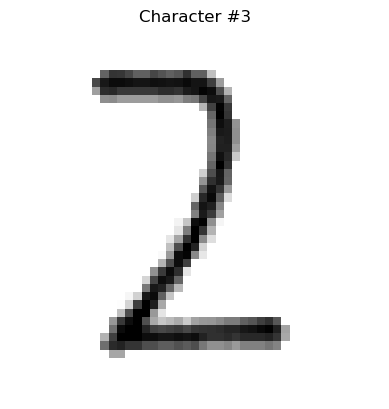

Recognized: 2

Recognized Equation: 4+2
Answer: 6


In [20]:
import matplotlib.pyplot as plt
# Add the new preprocess_symbol function here
def preprocess_symbol(char_roi, target_size=(45, 45), padding=5):
    """
    Process the cropped symbol to maintain its aspect ratio and quality:
    1. Create a blank (white) square image of the target size
    2. Resize the symbol while maintaining aspect ratio
    3. Center the symbol in the blank image
    """
    # Create a white background image
    background = np.ones((target_size[0], target_size[1]), dtype=np.uint8) * 255
    
    # Get dimensions of the character ROI
    h, w = char_roi.shape[:2]
    
    # Calculate the aspect ratio and determine new dimensions
    aspect_ratio = w / h
    
    # Calculate new dimensions while maintaining aspect ratio
    # Leave some padding around the character
    max_dim = max(target_size) - (padding * 2)
    
    if aspect_ratio > 1:  # Width is greater than height
        new_width = max_dim
        new_height = int(new_width / aspect_ratio)
    else:  # Height is greater than or equal to width
        new_height = max_dim
        new_width = int(new_height * aspect_ratio)
    
    # Resize the character image
    resized_char = cv2.resize(char_roi, (new_width, new_height), 
                             interpolation=cv2.INTER_AREA)
    
    # Calculate position to center the character in the background
    x_offset = (target_size[1] - new_width) // 2
    y_offset = (target_size[0] - new_height) // 2
    
    # Place the character in the center of the background
    background[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = resized_char
    
    return background

# Mapping from class names to readable characters
symbol_map = {
    "plus": "+",
    "minus": "-",
    "times": "×",
    "divide": "÷",
    "equals": "=",
    "decimal": ".",
    "one": "1",
    "two": "2",
    "three": "3",
    "four": "4",
    "five": "5",
    "six": "6",
    "seven": "7",
    "eight": "8",
    "nine": "9",
    "zero": "0",
    # Add more if needed
}

# Define the transformations - MODIFY THIS PART to remove the resize step
recognition_transforms = transforms.Compose([
    # Removed the resize step since we're handling it in preprocess_symbol
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

recognized_characters = []
if equation_image and bounding_boxes:
    open_cv_image = np.array(equation_image)
    if len(open_cv_image.shape) == 3:
        open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2GRAY)
    for i, (x, y, w, h) in enumerate(sorted(bounding_boxes, key=lambda i: i[0])):
        char_roi = open_cv_image[y:y + h, x:x + w]
        
        # Process the character while maintaining aspect ratio - ADD THIS LINE
        processed_char = preprocess_symbol(char_roi)
        
        # Convert to PIL image - MODIFY THIS LINE
        char_pil = Image.fromarray(processed_char)
        
        # Show the processed character image
        plt.imshow(char_pil, cmap='gray')
        plt.title(f"Character #{i + 1}")
        plt.axis('off')
        plt.show()
        
        # Transform and predict with the processed character
        input_tensor = recognition_transforms(char_pil).unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(input_tensor)
            _, predicted_idx = torch.max(output, 1)
            predicted_label = class_names[predicted_idx[0]]
            readable_char = symbol_map.get(predicted_label, predicted_label)
            recognized_characters.append(readable_char)
            print(f"Recognized: {readable_char}")

    recognized_equation = "".join(recognized_characters).replace('×', '*').replace('÷', '/')
    try:
        answer = eval(recognized_equation)
        print(f"\nRecognized Equation: {recognized_equation}")
        print(f"Answer: {answer}")
    except (SyntaxError, TypeError, NameError, ZeroDivisionError) as e:
        print(f"\nError evaluating equation: {recognized_equation} - {e}")
else:
    print("No equation image or bounding boxes found.")
